# INF-0619 - Trabalho Final
### Tema:
* Análise da Gravidade de Artrose no Joelho

### Grupo:
* Elcio Keniti Suzuki
* Hamilton Gonçalves de Araújo
* José Renato de Oliveira
* Maurício Luiz Sobrinho
* Tomais Gonçalves Peluso

## Instruções
#### Baixar o dataset https://drive.google.com/drive/folders/16kCVi1XH165MrqdV1PawyDfYvxSOVjio?usp=sharing
#### Descompactar o arquivo baixado no mesmo diretório deste jupyter notebook

In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_path= 'dataset'+ os.sep + 'train'
val_path= 'dataset'+ os.sep + 'val'
test_path= 'dataset'+ os.sep + 'test'

In [3]:
def findClassName (row):   
    if row['ClassId'] == 0 or row['ClassId'] == '0' :
        return 'Saudavel'
    if row['ClassId'] == 1 or row['ClassId'] == '1' :
        return 'Duvidoso'
    if row['ClassId'] == 2 or row['ClassId'] == '2' :
        return 'Minimo'
    if row['ClassId'] == 3 or row['ClassId'] == '3' :
        return 'Moderado'
    if row['ClassId'] == 4 or row['ClassId'] == '4' :
        return 'Severo'

## Análise Training Set

In [4]:
train_image_names = glob.glob(train_path + '/*/*.png')
print("Total number of training images: ", len(train_image_names))
train_image_names = pd.Series(train_image_names)

# train_df: a dataframe with 2 field: Filename, ClassId
train_df = pd.DataFrame()

# generate Filename field
#train_df['Filename'] = train_image_names.map(lambda img_name: img_name.split(os.sep)[-1])
train_df['Filename'] = train_image_names.map(lambda img_name: img_name)

# generate ClassId field
train_df['ClassId'] = train_image_names.map(lambda img_name: int(img_name.split(os.sep)[-2]))

train_df['ClassName'] = train_df.apply(lambda row: findClassName(row), axis=1)

Total number of training images:  5781


[Text(0, 0, '1046'),
 Text(0, 0, '1516'),
 Text(0, 0, '757'),
 Text(0, 0, '2289'),
 Text(0, 0, '173')]

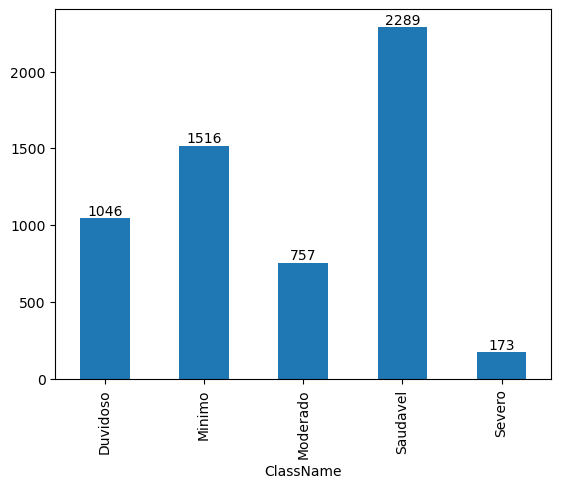

In [5]:
tmp = train_df.groupby('ClassName').count().reset_index()
ax = tmp.drop('Filename', axis=1).plot.bar(x='ClassName', legend=None)
ax.bar_label(ax.containers[0])

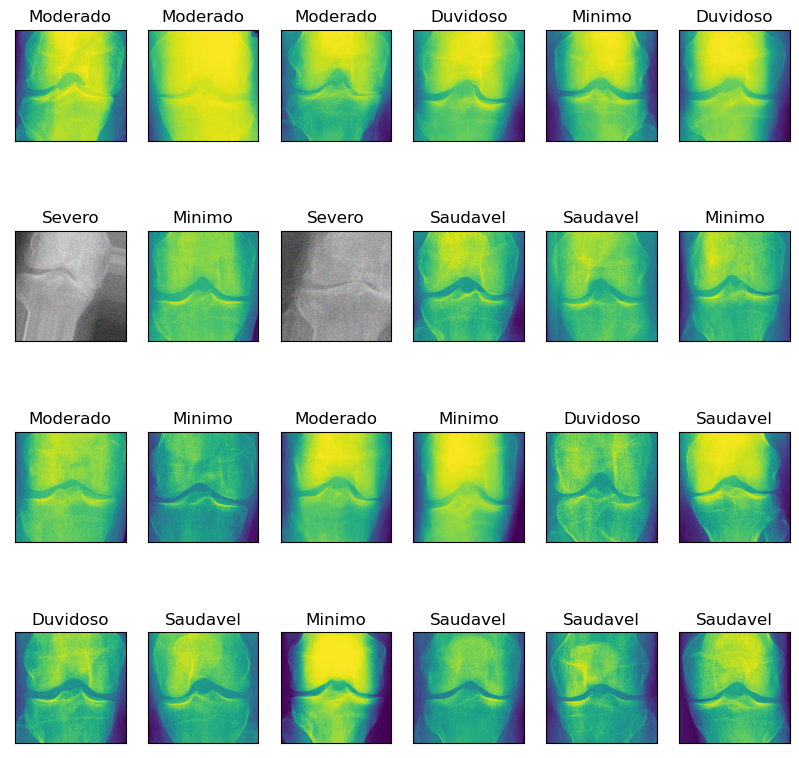

In [29]:
plot_df = train_df.sample(24).reset_index()
plt.figure(figsize=(10, 10))

for i in range(24):
    img_name = plot_df.loc[i, 'Filename']
    label_id = plot_df.loc[i, 'ClassId']
    label_name = plot_df.loc[i, 'ClassName']
    plt.subplot(4,6,i+1)
    plt.imshow(plt.imread(img_name))
    plt.title(label_name)
    plt.xticks([])
    plt.yticks([])

## Análise Validation Set

In [7]:
val_image_names = glob.glob(val_path + '/*/*.png')
print("Total number of validation images: ", len(val_image_names))
val_image_names = pd.Series(val_image_names)

# val_df: a dataframe with 2 field: Filename, ClassId
val_df = pd.DataFrame()

# generate Filename field
val_df['Filename'] = val_image_names.map(lambda img_name: img_name)

# generate ClassId field
val_df['ClassId'] = val_image_names.map(lambda img_name: int(img_name.split(os.sep)[-2]))

val_df['ClassName'] = val_df.apply(lambda row: findClassName(row), axis=1)

Total number of validation images:  826


[Text(0, 0, '153'),
 Text(0, 0, '212'),
 Text(0, 0, '106'),
 Text(0, 0, '328'),
 Text(0, 0, '27')]

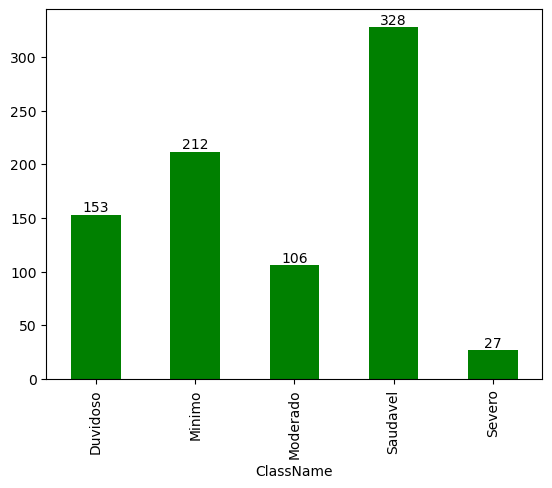

In [32]:
tmp = val_df.groupby('ClassName').count().reset_index()
ax = tmp.drop('Filename', axis=1).plot.bar(x='ClassName', legend=None, color='green')
ax.bar_label(ax.containers[0])

## Análise Test Set

In [9]:
test_image_names = glob.glob(test_path + '/*/*.png')
print("Total number of test images: ", len(test_image_names))
test_image_names = pd.Series(test_image_names)

# test_df: a dataframe with 2 field: Filename, ClassId
test_df = pd.DataFrame()

# generate Filename field
test_df['Filename'] = test_image_names.map(lambda img_name: img_name)

# generate ClassId field
test_df['ClassId'] = test_image_names.map(lambda img_name: int(img_name.split(os.sep)[-2]))

test_df['ClassName'] = test_df.apply(lambda row: findClassName(row), axis=1)

Total number of test images:  1656


[Text(0, 0, '296'),
 Text(0, 0, '447'),
 Text(0, 0, '223'),
 Text(0, 0, '639'),
 Text(0, 0, '51')]

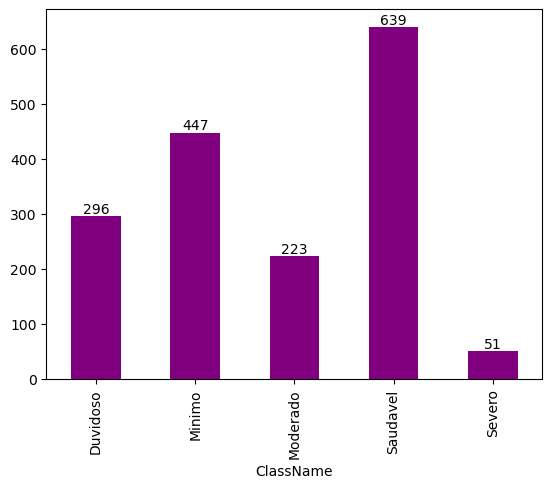

In [31]:
tmp = test_df.groupby('ClassName').count().reset_index()
ax = tmp.drop('Filename', axis=1).plot.bar(x='ClassName', legend=None, color='purple')
ax.bar_label(ax.containers[0])

## Transformação da coluna ClassId de Int para Str

In [11]:
train_df['ClassId']= train_df['ClassId'].apply(str)
val_df['ClassId']= val_df['ClassId'].apply(str)
test_df['ClassId']= test_df['ClassId'].apply(str)

## Carregamento dos Dados

In [12]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

from random import seed, sample
seed(42)


height=224
width=224
channels=3
batch_size=32

img_shape=(height, width, channels)
img_size=(height, width)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    #zoom_range=0.2,         # transformação 2: zoom na imagem
    #vertical_flip=True,     # transformação 2: zoom na imagem
    #horizontal_flip=True,   # transformação 3: espelhamento
    rescale = 1./255
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    #rotation_range=45,
    rescale = 1./255
)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

validation_generator = train_datagen.flow_from_directory(
        val_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)


Found 5781 images belonging to 5 classes.
Found 826 images belonging to 5 classes.
Found 1656 images belonging to 5 classes.


## Análise dos Peso das Classes

In [13]:
#
# Balanceamento das classes
#
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight( 'balanced', classes=np.unique(train_generator.classes),  y=train_generator.classes)
train_class_weights = dict(enumerate(class_weights))
print(train_class_weights)

{0: 0.5051114023591088, 1: 1.1053537284894837, 2: 0.762664907651715, 3: 1.5273447820343462, 4: 6.683236994219653}


## Modelo Baseline
### Utilizar:
* train_generator
* train_class_weights
* validation_generator

## Data Augmentation

### Desbalanceamento das Classes no Dataset de Treinamento

In [14]:
train_df.groupby('ClassName').count()

,Filename,ClassId
ClassName,,
Duvidoso,1046,1046
Minimo,1516,1516
Moderado,757,757
Saudavel,2289,2289
Severo,173,173


### Como as classes estão muito desbalanceadas, então serão considerados 600 amostras por classe

In [15]:
max_size= 600

In [16]:
sample_list=[]

groups=train_df.groupby('ClassName')
for label in train_df['ClassName'].unique():                 
    group=groups.get_group(label)
    sample_count=len(group)    
    if sample_count> max_size:
        samples=group.sample(max_size, replace=False, weights=None, random_state=123, axis=0).reset_index(drop=True)
    else:
        samples=group.sample(frac=1.0, replace=False, random_state=123, axis=0).reset_index(drop=True)
    sample_list.append(samples)
train_df=pd.concat(sample_list, axis=0).reset_index(drop=True)
print (len(train_df))     
print (train_df['ClassName'].value_counts())

2573
Saudavel    600
Duvidoso    600
Minimo      600
Moderado    600
Severo      173
Name: ClassName, dtype: int64


### Geração de imagens sintéticas para completar as 600 imagens por classe

In [17]:
import shutil

In [18]:
working_dir=r'./aug'

In [19]:
aug_dir=os.path.join(working_dir)
if os.path.isdir(aug_dir):
    shutil.rmtree(aug_dir)
os.mkdir(aug_dir)
for label in train_df['ClassId'].unique():
    dir_path=os.path.join(aug_dir,label)
    os.mkdir(dir_path)
print(os.listdir(aug_dir))

['0', '1', '2', '3', '4']


### Função auxiliar para adicionar ruído gaussiano:

In [20]:
import random
def add_noise(img):
    '''Add random noise to an image'''
    VARIABILITY = 50
    deviation = VARIABILITY*random.random()
    noise = np.random.normal(0, deviation, img.shape)
    img += noise
    np.clip(img, 0., 255.)
    return img

In [21]:
target=600 # set the target count for each class in df

In [22]:

gen=tf.keras.preprocessing.image.ImageDataGenerator(
        horizontal_flip=True,
        rotation_range=20,
        width_shift_range=.2,
        height_shift_range=.2,
        zoom_range=.2,
        preprocessing_function=add_noise
)
groups=train_df.groupby('ClassId') # group by class
for label in train_df['ClassId'].unique():  # for every class               
    group=groups.get_group(label)  # a dataframe holding only rows with the specified label 
    sample_count=len(group)   # determine how many samples there are in this class  
    if sample_count< target: # if the class has less than target number of images
        aug_img_count=0
        delta=target-sample_count  # number of augmented images to create
        target_dir=os.path.join(aug_dir, label)  # define where to write the images    
        aug_gen=gen.flow_from_dataframe( group,  x_col='Filename', y_col=None, target_size=img_size, class_mode=None, batch_size=1,
                                         shuffle=False, save_to_dir=target_dir, save_prefix='aug',save_format='jpg')
        while aug_img_count<delta:
            images=next(aug_gen)            
            aug_img_count += len(images) 

Found 173 validated image filenames.


### Dataset de treinamento balanceado com 600 imagens por categoria 

In [23]:
aug_fpaths=[]
aug_labels=[]
classlist=os.listdir(aug_dir)
for klass in classlist:
    classpath=os.path.join(aug_dir, klass)     
    flist=os.listdir(classpath)    
    for f in flist:        
        fpath=os.path.join(classpath,f)         
        aug_fpaths.append(fpath)
        aug_labels.append(klass)
Fseries=pd.Series(aug_fpaths, name='Filename')
Lseries=pd.Series(aug_labels, name='ClassId')
aug_df=pd.concat([Fseries, Lseries], axis=1)
aug_df['ClassName'] = aug_df.apply(lambda row: findClassName(row), axis=1)
print ('length of aug_df is: ', len(aug_df))
train_df=pd.concat([train_df,aug_df], axis=0).reset_index(drop=True)
train_df=train_df.sample(frac=1.0, replace=False, random_state=123, axis=0).reset_index(drop=True)
print ('length of train_df is: ', len(train_df)) 
print (train_df['ClassId'].value_counts())     

length of aug_df is:  427
length of train_df is:  3000
2    600
0    600
1    600
3    600
4    600
Name: ClassId, dtype: int64


In [25]:
trgen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
train_aug_generator = trgen.flow_from_dataframe(train_df, x_col='Filename', y_col='ClassId', target_size=img_size,
                                          class_mode='categorical',shuffle=True, batch_size=batch_size)

Found 3000 validated image filenames belonging to 5 classes.


### Exemplos das imagens sintéticas

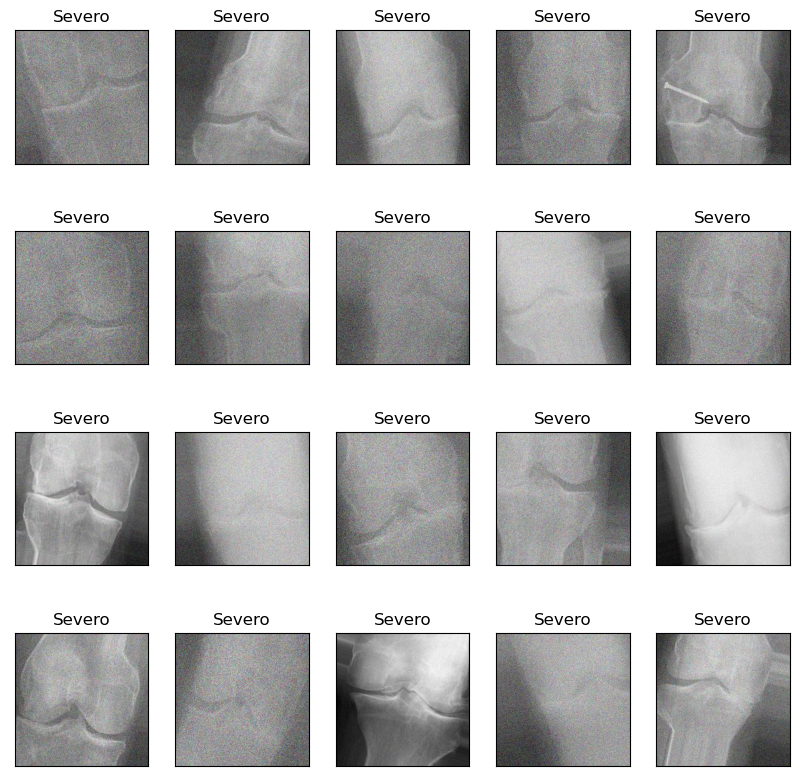

In [26]:
plot_df = aug_df.sample(20).reset_index()
plt.figure(figsize=(10, 10))

for i in range(20):
    img_name = plot_df.loc[i, 'Filename']
    label_id = plot_df.loc[i, 'ClassId']
    label_name = plot_df.loc[i, 'ClassName']
    plt.subplot(4,5,i+1)
    plt.imshow(plt.imread(img_name))
    plt.title(label_name)
    plt.xticks([])
    plt.yticks([])

## Double check do Balanceamento das Classes

In [28]:
#
# Balanceamento das classes
#
class_weights = class_weight.compute_class_weight( 'balanced', classes=np.unique(train_aug_generator.classes),  y=train_aug_generator.classes)
train_aug_class_weights = dict(enumerate(class_weights))
print(train_aug_class_weights)

{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0}


## Grid de Hyper Parameteros

## Experimentos:
### Utilizar:
* train_aug_generator
* train_aug_class_weights (se necessário)
* validation_generator

## Treinamento Modelo 1

## Treinamento Modelo 2

## Resnet50

In [ ]:
# Carregamento do modelo pré-treinado SEM as camadas densas (include_top = False)
model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.summary()

for layer in model.layers:
    layer.trainable = False

frozen_model = tf.keras.Sequential([
  model,
  tf.keras.layers.GlobalAveragePooling2D()
])

In [ ]:
feats_train = frozen_model.predict(train_generator)
feats_val = frozen_model.predict(validation_generator)

In [ ]:
print(feats_train.shape)

from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


clf = MLPClassifier(random_state=1, max_iter=400).fit(feats_train, train_generator.labels)

In [ ]:
acc_mlp = clf.score(feats_val, validation_generator.labels)
print("ACC MLP:", acc_mlp)

### Resnet50 + dense layers

In [ ]:
for layer in model.layers:
    layer.trainable = False

frozen_model = tf.keras.Sequential([
  model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
from sklearn.metrics import roc_auc_score
#from keras.callbacks import Callback
from tensorflow.keras.callbacks import Callback
class RocCallback(Callback):
    def __init__(self,training_data,validation_data):
        # training
        batch_index = 0
        while batch_index <= training_data.batch_index:
            img, label = training_data.next()
            if batch_index ==0:
              img_list = img
              label_list = label
            else:
              img_list = np.concatenate((img_list, img), axis=0)
              label_list = np.concatenate((label_list, label), axis=0)
            batch_index = batch_index + 1
        self.x = img_list
        self.y = label_list

        # validation
        batch_index = 0
        while batch_index <= validation_data.batch_index:
            img, label = validation_data.next()
            if batch_index ==0:
              img_list = img
              label_list = label
            else:
              img_list = np.concatenate((img_list, img), axis=0)
              label_list = np.concatenate((label_list, label), axis=0)
            batch_index = batch_index + 1
        self.x_val = img_list
        self.y_val = label_list


    def on_epoch_end(self, epoch, logs={}):
        y_pred_train = self.model.predict(self.x)
        print("SHAPE", y_pred_train.shape)
        roc_train = roc_auc_score(self.y[:,1], y_pred_train[:,1])
        y_pred_val = self.model.predict(self.x_val)
        roc_val = roc_auc_score(self.y_val[:,1], y_pred_val[:,1])
        logs["train_auc"] = roc_train
        logs["val_auc"] = roc_val
        keys = list(logs.keys())
        print('\rroc-auc_train: %s - roc-auc_val: %s' % (str(round(roc_train,4)),str(round(roc_val,4))),end=100*' '+'\n')
        return

In [ ]:
roc = RocCallback(training_data=train_generator,
                  validation_data=validation_generator)
from tensorflow.keras.callbacks import EarlyStopping

early = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
callbacksLst = [roc, early]

In [ ]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

frozen_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
frozen_model.fit(train_generator, epochs=25, class_weight = train_class_weights, callbacks=callbacksLst,
                  validation_data=validation_generator)

In [ ]:
# Avalia o modelo na validação
score = frozen_model.evaluate(validation_generator, verbose=1)

print('Valid loss:', score[0])
print('Valid acc:', score[1])

### Resnet + desnse + fine tuning

In [ ]:
for layer in model.layers:
    layer.trainable = True

ft_model = tf.keras.Sequential([
  model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(5, activation='softmax')
])    
    
ft_model.summary()

In [ ]:
ft_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
ft_model.fit(train_generator, epochs=50, class_weight = train_class_weights, callbacks=callbacksLst,
                  validation_data=validation_generator)

In [ ]:
score = ft_model.evaluate(validation_generator, verbose=1)

print('Valid loss:', score[0])
print('Valid acc:', score[1])

## VGG16

In [ ]:
# Carregamento do modelo pré-treinado SEM as camadas densas (include_top = False)
model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.summary()

for layer in model.layers:
    layer.trainable = False

frozen_model = tf.keras.Sequential([
  model,
  tf.keras.layers.GlobalAveragePooling2D()
])

In [ ]:
feats_train = frozen_model.predict(train_generator)
feats_val = frozen_model.predict(validation_generator)

In [ ]:
print(feats_train.shape)

from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


clf = MLPClassifier(random_state=1, max_iter=400).fit(feats_train, train_generator.labels)

In [ ]:
acc_mlp = clf.score(feats_val, validation_generator.labels)
print("ACC MLP:", acc_mlp)

### VGG16 + Dense

In [ ]:
for layer in model.layers:
    layer.trainable = False

frozen_model = tf.keras.Sequential([
  model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

frozen_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
frozen_model.fit(train_generator, epochs=25, class_weight = train_class_weights, callbacks=callbacksLst,
                  validation_data=validation_generator)

In [ ]:
score = frozen_model.evaluate(validation_generator, verbose=1)

print('Valid loss:', score[0])
print('Valid acc:', score[1])

### VGG + Dense + finetuning

In [ ]:
for layer in model.layers:
    layer.trainable = True

ft_model = tf.keras.Sequential([
  model,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(5, activation='softmax')
])    
    
ft_model.summary()

In [ ]:
ft_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
ft_model.fit(train_generator, epochs=50, class_weight = train_class_weights, callbacks=callbacksLst,
                  validation_data=validation_generator)

In [ ]:
score = ft_model.evaluate(test_generator, verbose=1)

print('Valid loss:', score[0])
print('Valid acc:', score[1])